In [1]:
import pandas as pd
import json

with open('C:\\Users\\vinut\\Desktop\\DataMining Project\\Software_5.json') as f:
    data = [json.loads(line) for line in f]
df = pd.DataFrame(data)
df.to_csv('output.csv', index=False)

In [47]:

df = pd.read_csv('output.csv')
df_sorted = df.sort_values(by='asin')
asin_counts = df_sorted['asin'].value_counts()
unique = asin_counts.index.tolist()
count = asin_counts.values.tolist()
unique_asin_data = pd.DataFrame({'asin': unique, 'count': count})
print("Unique values and their counts:")
print(unique_asin_data)

sum_hundred = asin_counts.head(100).sum()
print("Sum of the first 100 counts:", sum_hundred)



Unique values and their counts:
           asin  count
0    B0000AZJY6    452
1    B000EORV8Q    232
2    B0001FS9NE    230
3    B000050ZRE    230
4    B00EZPXYP4     98
..          ...    ...
797  B0011SFXCK      1
798  B00149YSUY      1
799  B0012KW3KM      1
800  B00132DENO      1
801  B0015CA9VW      1

[802 rows x 2 columns]
Sum of the first 100 counts: 4938


In [48]:
unique_asin_data.head(10)

,asin,count
0,B0000AZJY6,452
1,B000EORV8Q,232
2,B0001FS9NE,230
3,B000050ZRE,230
4,B00EZPXYP4,98
5,B00F8K9MZQ,74
6,B00CTTEKJW,74
7,B008H3SW4I,73
8,B000X86ZAS,72
9,B00MYXTCGY,64


In [3]:
import pandas as pd

# Assuming your data is in a DataFrame named 'df'
# Replace 'your_dataset.csv' with your actual dataset filename
df = pd.read_csv('output.csv')

# Filter data for 'B0000AZJY6'
filtered_data = df[df['asin'] == 'B00EZPXYP4']

# Save filtered data to a new file
filtered_data.to_csv('B00EZPXYP4_data.csv', index=False)

In [4]:
df5 = pd.read_csv('C:\\Users\\vinut\\Desktop\\DataMining Project\\B00EZPXYP4_data.csv')

df5.head(5)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,False,"11 4, 2013",A3CG93783LP0FO,B00EZPXYP4,{'Platform:': ' PC Disc'},Yarii (cat mom),"I've used Norton 360 since 2009, except for a ...",As great as always,1383523200,36.0,NaN
1,5.0,False,"11 3, 2013",A2WCFDOCS73PNB,B00EZPXYP4,{'Platform:': ' PC Disc'},Gadgetman,I have been using Norton 360 for all of my PC ...,Stable and easy to use,1383436800,2.0,NaN
2,4.0,False,"11 3, 2013",AMUP8DYE7EAN2,B00EZPXYP4,{'Platform:': ' PC Disc'},mateo52,"Because, while I'm not about to go looking und...","Um, Whatever I said last year.",1383436800,6.0,NaN
3,5.0,True,"07 31, 2017",A1CHOUPK2ZXJ42,B00EZPXYP4,{'Platform:': ' PC Disc'},James W. Schlotzhauer,"Right product, Right price.",Five Stars,1501459200,NaN,NaN
4,5.0,True,"02 7, 2016",ALLCK39NM5RJY,B00EZPXYP4,{'Platform:': ' PC Download'},mbrugh,great,Five Stars,1454803200,NaN,NaN


In [5]:
print(df5.columns)

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')


In [6]:
columns_to_remove = ['image', 'style']
df5 = df5.drop(columns=columns_to_remove)
df5.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote
0,5.0,False,"11 4, 2013",A3CG93783LP0FO,B00EZPXYP4,Yarii (cat mom),"I've used Norton 360 since 2009, except for a ...",As great as always,1383523200,36.0
1,5.0,False,"11 3, 2013",A2WCFDOCS73PNB,B00EZPXYP4,Gadgetman,I have been using Norton 360 for all of my PC ...,Stable and easy to use,1383436800,2.0
2,4.0,False,"11 3, 2013",AMUP8DYE7EAN2,B00EZPXYP4,mateo52,"Because, while I'm not about to go looking und...","Um, Whatever I said last year.",1383436800,6.0
3,5.0,True,"07 31, 2017",A1CHOUPK2ZXJ42,B00EZPXYP4,James W. Schlotzhauer,"Right product, Right price.",Five Stars,1501459200,NaN
4,5.0,True,"02 7, 2016",ALLCK39NM5RJY,B00EZPXYP4,mbrugh,great,Five Stars,1454803200,NaN


In [7]:
null = df5.isnull().sum()
print(null)

overall            0
verified           0
reviewTime         0
reviewerID         0
asin               0
reviewerName       0
reviewText         0
summary            0
unixReviewTime     0
vote              91
dtype: int64


In [8]:
df5['summary'].fillna('No summary', inplace=True)
df5['vote'].fillna(0, inplace=True)
null2 = df5.isnull().sum()
print(null2)

overall           0
verified          0
reviewTime        0
reviewerID        0
asin              0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
vote              0
dtype: int64


In [9]:
count = df5['verified'].value_counts()
print(count)

verified
True     73
False    25
Name: count, dtype: int64


In [10]:
columns_to_remove = ['unixReviewTime', 'reviewTime','reviewerName','verified','vote']
df5 = df5.drop(columns=columns_to_remove)
df5.head(5)

,overall,reviewerID,asin,reviewText,summary
0,5.0,A3CG93783LP0FO,B00EZPXYP4,"I've used Norton 360 since 2009, except for a ...",As great as always
1,5.0,A2WCFDOCS73PNB,B00EZPXYP4,I have been using Norton 360 for all of my PC ...,Stable and easy to use
2,4.0,AMUP8DYE7EAN2,B00EZPXYP4,"Because, while I'm not about to go looking und...","Um, Whatever I said last year."
3,5.0,A1CHOUPK2ZXJ42,B00EZPXYP4,"Right product, Right price.",Five Stars
4,5.0,ALLCK39NM5RJY,B00EZPXYP4,great,Five Stars


In [11]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
def tokenize_text(text):
    tokens = word_tokenize(str(text))  # Tokenize the text
    return tokens
# Tokenizing 'reviewText' column
df5['reviewText'] = df5['reviewText'].apply(tokenize_text)

# Tokenizing 'summary' column
df5['summary'] = df5['summary'].apply(tokenize_text)

print()

In [13]:
# printing reviewText 
print("Tokenized Review Text:")
for index, tokens in enumerate(df5['reviewText'].head(), start=1):
    print(f"Row {index}: {tokens}")

# Printing tokenized summary
print("\nTokenized Summary:")
for index, tokens in enumerate(df5['summary'].head(), start=1):
    print(f"Row {index}: {tokens}")

Tokenized Review Text:
Row 1: ['I', "'ve", 'used', 'Norton', '360', 'since', '2009', ',', 'except', 'for', 'a', '6', 'month', 'time', 'period', 'about', 'a', 'year', 'ago', 'when', 'I', 'tried', 'Avast-Free', 'which', 'left', 'me', 'with', '2', 'Trojan', 'files', 'that', 'Norton', '360', 'picked', 'up', 'on', 'the', 'minute', 'I', 're-installed', 'it', '.', 'Since', 'this', 'is', 'a', '3', 'PC', 'copy', ',', 'I', 'also', 'installed', 'it', 'on', 'my', 'old', 'desktop', 'PC', 'I', 'use', 'for', 'work', 'projects', ',', 'and', 'on', 'my', 'netbook', '.', 'This', 'runs', 'unobtrusively', 'in', 'the', 'background', ',', 'even', 'when', 'doing', 'a', 'short', 'scan', ',', 'and', 'does', "n't", 'slow', 'any', 'of', 'my', 'PC', "'s", 'down', '.', 'Here', 'is', 'what', 'I', 'have', 'mine', 'installed', 'on', ':', 'Home', 'Desktop', 'PC', ':', 'Windows', '8.1', ',', '3.4', 'Ghz', 'Processor', ',', '4', 'GB', 'memory', ',', 'Chrome', 'browser', 'Home', 'Netbook', ':', 'Windows', '7', 'Starter', 

In [14]:

df5['reviewText'] = df5['reviewText'].apply(lambda tokens: [token.lower() for token in tokens])

df5['summary'] = df5['summary'].apply(lambda tokens: [token.lower() for token in tokens])

In [15]:

print("Lowercase Tokens for Review Text:")
for index, tokens in enumerate(df5['reviewText'].head(), start=1):
    print(f"Row {index}: {tokens}")

print("\nLowercase Tokens for Summary:")
for index, tokens in enumerate(df5['summary'].head(), start=1):
    print(f"Row {index}: {tokens}")


Lowercase Tokens for Review Text:
Row 1: ['i', "'ve", 'used', 'norton', '360', 'since', '2009', ',', 'except', 'for', 'a', '6', 'month', 'time', 'period', 'about', 'a', 'year', 'ago', 'when', 'i', 'tried', 'avast-free', 'which', 'left', 'me', 'with', '2', 'trojan', 'files', 'that', 'norton', '360', 'picked', 'up', 'on', 'the', 'minute', 'i', 're-installed', 'it', '.', 'since', 'this', 'is', 'a', '3', 'pc', 'copy', ',', 'i', 'also', 'installed', 'it', 'on', 'my', 'old', 'desktop', 'pc', 'i', 'use', 'for', 'work', 'projects', ',', 'and', 'on', 'my', 'netbook', '.', 'this', 'runs', 'unobtrusively', 'in', 'the', 'background', ',', 'even', 'when', 'doing', 'a', 'short', 'scan', ',', 'and', 'does', "n't", 'slow', 'any', 'of', 'my', 'pc', "'s", 'down', '.', 'here', 'is', 'what', 'i', 'have', 'mine', 'installed', 'on', ':', 'home', 'desktop', 'pc', ':', 'windows', '8.1', ',', '3.4', 'ghz', 'processor', ',', '4', 'gb', 'memory', ',', 'chrome', 'browser', 'home', 'netbook', ':', 'windows', '7', 

In [16]:
import re

# Function to remove special characters and spaces from tokens
def remove_special_characters(tokens):
    # Define regex pattern to remove spaces and special characters
    pattern = r'[^a-zA-Z0-9]'  # Keeps letters and numbers
    
    # Remove special characters and spaces using regex
    tokens_no_special = [re.sub(pattern, '', token) for token in tokens]
    tokens_no_special = [token for token in tokens_no_special if token]  # Remove empty strings
    return tokens_no_special

# Remove special characters and spaces from 'reviewText' column
df5['reviewText'] = df5['reviewText'].apply(remove_special_characters)

# Remove special characters and spaces from 'summary' column
df5['summary'] = df5['summary'].apply(remove_special_characters)

In [17]:
# Print tokens with special characters removed for 'reviewText_tokens_clean' column
print("Tokens with Special Characters Removed for Review Text:")
for index, tokens in enumerate(df5['reviewText'].head(), start=1):
    print(f"Row {index}: {tokens}")

# Print tokens with special characters removed for 'summary_tokens_clean' column
print("\nTokens with Special Characters Removed for Summary:")
for index, tokens in enumerate(df5['summary'].head(), start=1):
    print(f"Row {index}: {tokens}")

Tokens with Special Characters Removed for Review Text:
Row 1: ['i', 've', 'used', 'norton', '360', 'since', '2009', 'except', 'for', 'a', '6', 'month', 'time', 'period', 'about', 'a', 'year', 'ago', 'when', 'i', 'tried', 'avastfree', 'which', 'left', 'me', 'with', '2', 'trojan', 'files', 'that', 'norton', '360', 'picked', 'up', 'on', 'the', 'minute', 'i', 'reinstalled', 'it', 'since', 'this', 'is', 'a', '3', 'pc', 'copy', 'i', 'also', 'installed', 'it', 'on', 'my', 'old', 'desktop', 'pc', 'i', 'use', 'for', 'work', 'projects', 'and', 'on', 'my', 'netbook', 'this', 'runs', 'unobtrusively', 'in', 'the', 'background', 'even', 'when', 'doing', 'a', 'short', 'scan', 'and', 'does', 'nt', 'slow', 'any', 'of', 'my', 'pc', 's', 'down', 'here', 'is', 'what', 'i', 'have', 'mine', 'installed', 'on', 'home', 'desktop', 'pc', 'windows', '81', '34', 'ghz', 'processor', '4', 'gb', 'memory', 'chrome', 'browser', 'home', 'netbook', 'windows', '7', 'starter', '166', 'ghz', 'processor', '2', 'gb', 'memor

In [18]:
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not downloaded
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from tokens
def remove_stopwords(tokens):
    tokens_no_stop = [token for token in tokens if token not in stop_words]
    return tokens_no_stop

# Remove stopwords from 'reviewText_tokens_no_punct' column
df5['reviewText'] = df5['reviewText'].apply(remove_stopwords)

# Remove stopwords from 'summary_tokens_no_punct' column
df5['summary'] = df5['summary'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Print tokens without stopwords for 'reviewText_tokens_no_stop' column
print("Tokens without Stopwords for Review Text:")
for index, tokens in enumerate(df5['reviewText'].head(), start=1):
    print(f"Row {index}: {tokens}")

# Print tokens without stopwords for 'summary_tokens_no_stop' column
print("\nTokens without Stopwords for Summary:")
for index, tokens in enumerate(df5['summary'].head(), start=1):
    print(f"Row {index}: {tokens}")

Tokens without Stopwords for Review Text:
Row 1: ['used', 'norton', '360', 'since', '2009', 'except', '6', 'month', 'time', 'period', 'year', 'ago', 'tried', 'avastfree', 'left', '2', 'trojan', 'files', 'norton', '360', 'picked', 'minute', 'reinstalled', 'since', '3', 'pc', 'copy', 'also', 'installed', 'old', 'desktop', 'pc', 'use', 'work', 'projects', 'netbook', 'runs', 'unobtrusively', 'background', 'even', 'short', 'scan', 'nt', 'slow', 'pc', 'mine', 'installed', 'home', 'desktop', 'pc', 'windows', '81', '34', 'ghz', 'processor', '4', 'gb', 'memory', 'chrome', 'browser', 'home', 'netbook', 'windows', '7', 'starter', '166', 'ghz', 'processor', '2', 'gb', 'memory', 'mozilla', 'firefox', 'browser', 'latest', 'version', 'old', 'desktop', 'pc', 'windows', 'xp', 'professional', '24', 'ghz', 'processor', '512k', 'memory', 'also', 'think', 'smarter', 'purchase', 'cd', 'lieu', 'downloading', 'amazon', 'like', 'physical', 'copy', 'hand', 'lieu', 'download', 'similarly', 'buy', 'cd', 'instead'

In [20]:
df5

,overall,reviewerID,asin,reviewText,summary
0,5.0,A3CG93783LP0FO,B00EZPXYP4,"[used, norton, 360, since, 2009, except, 6, mo...","[great, always]"
1,5.0,A2WCFDOCS73PNB,B00EZPXYP4,"[using, norton, 360, pc, laptops, home, many, ...","[stable, easy, use]"
2,4.0,AMUP8DYE7EAN2,B00EZPXYP4,"[go, looking, hood, ca, nt, see, mechanics, pu...","[um, whatever, said, last, year]"
3,5.0,A1CHOUPK2ZXJ42,B00EZPXYP4,"[right, product, right, price]","[five, stars]"
4,5.0,ALLCK39NM5RJY,B00EZPXYP4,[great],"[five, stars]"
...,...,...,...,...,...
93,4.0,A23J1T7UNX14TK,B00EZPXYP4,"[always, norton, releases, another, good, prod...","[good, system, protection]"
94,5.0,A2FBPS1P12N24T,B00EZPXYP4,"[30, years, since, got, first, pc, 50, years, ...","[getting, nobrainer]"
95,2.0,A3H7ADUP07D93H,B00EZPXYP4,"[switched, norton, decade, trend, micro, reall...","[extremely, slow, good, popups]"
96,5.0,A47D5C32VLQM2,B00EZPXYP4,"[norton, best, comes, internet, security, part...","[nt, computer, without, norton]"


In [21]:
# Function to get sentiment polarity
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity
df5['sentiment'] = df5['reviewText'].apply(get_sentiment)
print(df5[['reviewText', 'sentiment']].head(10))

                                          reviewText  sentiment
0  [used, norton, 360, since, 2009, except, 6, mo...   0.019697
1  [using, norton, 360, pc, laptops, home, many, ...   0.301389
2  [go, looking, hood, ca, nt, see, mechanics, pu...   0.113194
3                     [right, product, right, price]   0.285714
4                                            [great]   0.800000
5  [price, product, nearly, trippled, since, boug...   0.166667
6  [message, norton, 360, 2014, 2015, products, s...  -0.015152
7                          [loyal, norton, products]   0.333333
8                 [great, product, works, described]   0.800000
9                                             [good]   0.700000


In [22]:
# Function to convert sentiment scores to categorical values
def get_sentiment_category(score):
    if score >= 0.3:  
        return 1  # Positive sentiment
    elif score < -0.1:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment or no strong sentiment
df5['sentiment_category'] = df5['sentiment'].apply(get_sentiment_category)
df5.head(50)

,overall,reviewerID,asin,reviewText,summary,sentiment,sentiment_category
0,5.0,A3CG93783LP0FO,B00EZPXYP4,"[used, norton, 360, since, 2009, except, 6, mo...","[great, always]",0.019697,0
1,5.0,A2WCFDOCS73PNB,B00EZPXYP4,"[using, norton, 360, pc, laptops, home, many, ...","[stable, easy, use]",0.301389,1
2,4.0,AMUP8DYE7EAN2,B00EZPXYP4,"[go, looking, hood, ca, nt, see, mechanics, pu...","[um, whatever, said, last, year]",0.113194,0
3,5.0,A1CHOUPK2ZXJ42,B00EZPXYP4,"[right, product, right, price]","[five, stars]",0.285714,0
4,5.0,ALLCK39NM5RJY,B00EZPXYP4,[great],"[five, stars]",0.800000,1
5,5.0,A1U1G73EI5IRZF,B00EZPXYP4,"[price, product, nearly, trippled, since, boug...","[price, product, nearly, trippled, since]",0.166667,0
6,1.0,A1MKYTB0PW16IS,B00EZPXYP4,"[message, norton, 360, 2014, 2015, products, s...","[nt, buy, stuff]",-0.015152,0
7,5.0,A3B3CXPFQ8VBHY,B00EZPXYP4,"[loyal, norton, products]","[great, produce]",0.333333,1
8,5.0,A3QED0Y8VGXZJJ,B00EZPXYP4,"[great, product, works, described]","[five, stars]",0.800000,1
9,5.0,AJKGD52I9DGCN,B00EZPXYP4,[good],"[five, stars]",0.700000,1


In [23]:
df5['sentiment_category'].value_counts()

sentiment_category
 0    50
 1    44
-1     4
Name: count, dtype: int64

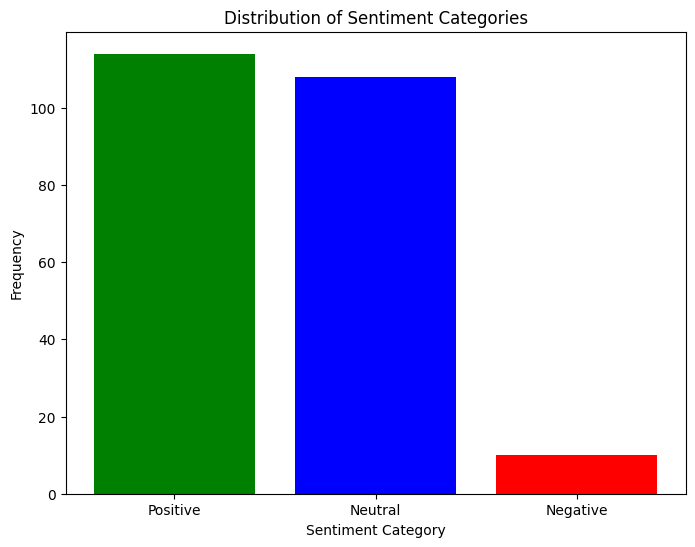

In [24]:
import matplotlib.pyplot as plt
sentiment_categories = [114, 108, 10]
categories = ['Positive', 'Neutral', 'Negative']

#bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, sentiment_categories, color=['green', 'blue', 'red'])
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Categories')
plt.show()

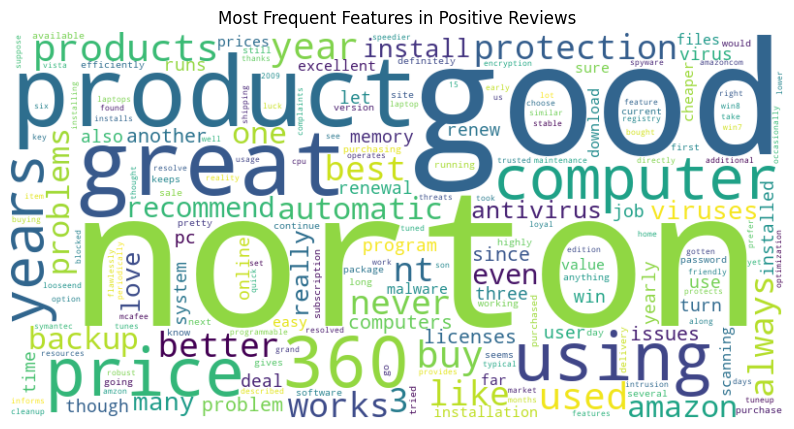

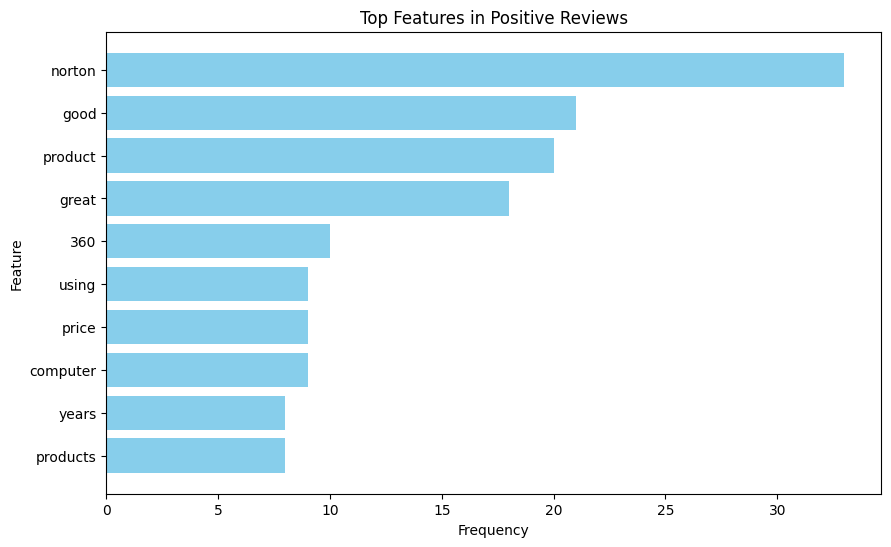

In [26]:
from nltk import pos_tag, word_tokenize
from collections import Counter
from wordcloud import WordCloud

positive_reviews = df5[df5['sentiment_category'] == 1]['reviewText']
feature_words = [word for review in positive_reviews for word in review]
feature_word_freq = Counter(feature_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(feature_word_freq)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Features in Positive Reviews')
plt.show()

top_features = feature_word_freq.most_common(10)  # Top 10 features
feature_names, frequencies = zip(*top_features)

plt.figure(figsize=(10, 6))
plt.barh(feature_names, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Feature')
plt.title('Top Features in Positive Reviews')
plt.gca().invert_yaxis()
plt.show()

In [27]:
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity
df5['sentiment2'] = df5['summary'].apply(get_sentiment)
print(df5[['summary', 'sentiment2']].head(10))

                                     summary  sentiment2
0                            [great, always]    0.800000
1                        [stable, easy, use]    0.433333
2           [um, whatever, said, last, year]    0.000000
3                              [five, stars]    0.000000
4                              [five, stars]    0.000000
5  [price, product, nearly, trippled, since]    0.100000
6                           [nt, buy, stuff]    0.000000
7                           [great, produce]    0.800000
8                              [five, stars]    0.000000
9                              [five, stars]    0.000000


In [28]:
def get_sentiment_category(score):
    if score > 0.5: 
        return 1  # Positive sentiment
    elif score < -0.1:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment or no strong sentiment

df5['sentiment2_category'] = df5['sentiment2'].apply(get_sentiment_category)
print(df5[['summary', 'sentiment2_category']].head(10))

                                     summary  sentiment2_category
0                            [great, always]                    1
1                        [stable, easy, use]                    0
2           [um, whatever, said, last, year]                    0
3                              [five, stars]                    0
4                              [five, stars]                    0
5  [price, product, nearly, trippled, since]                    0
6                           [nt, buy, stuff]                    0
7                           [great, produce]                    1
8                              [five, stars]                    0
9                              [five, stars]                    0


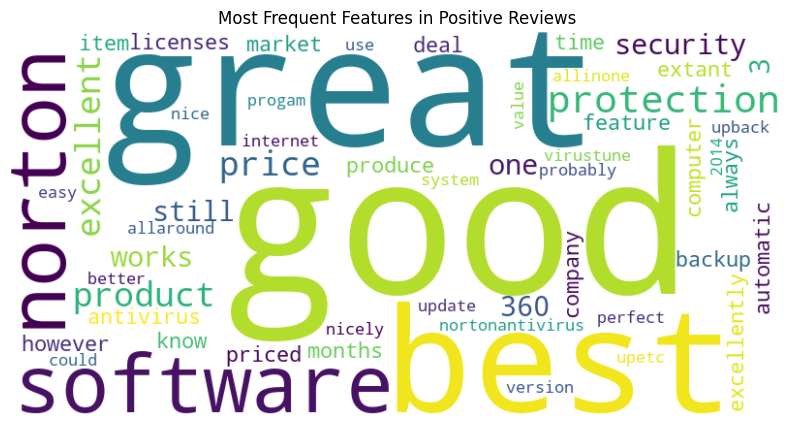

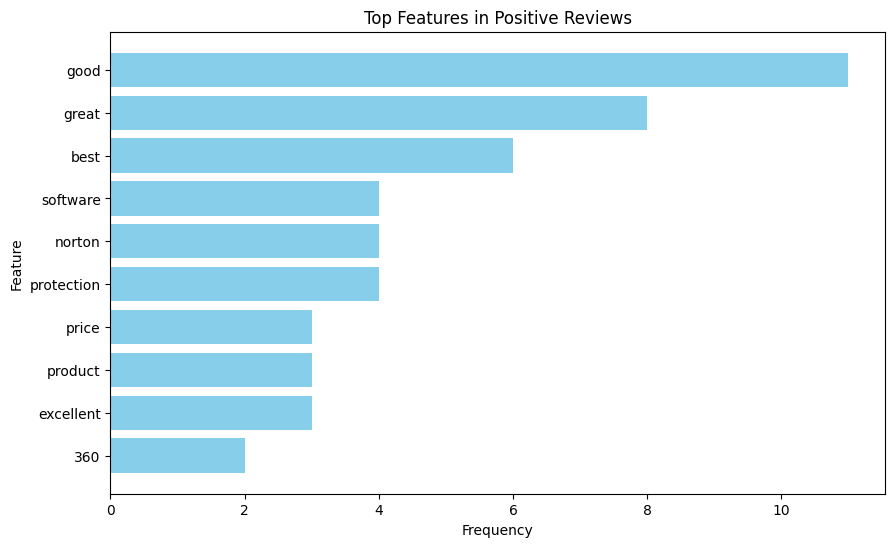

In [29]:
from nltk import pos_tag, word_tokenize
from collections import Counter
from wordcloud import WordCloud
positive_reviews = df5[df5['sentiment2_category'] == 1]['summary']
feature_words = [word for review in positive_reviews for word in review]
feature_word_freq = Counter(feature_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(feature_word_freq)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Features in Positive Reviews')
plt.show()

top_features = feature_word_freq.most_common(10)  # Top 10 features
feature_names, frequencies = zip(*top_features)

plt.figure(figsize=(10, 6))
plt.barh(feature_names, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Feature')
plt.title('Top Features in Positive Reviews')
plt.gca().invert_yaxis()
plt.show()

In [30]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vinut\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [31]:
#Aspect based sentiment analysis
from nltk import pos_tag
tagged_feature = pos_tag(feature_words)
aspect_keyword = [word for word, pos in tagged_feature if pos in ['NN', 'NNS', 'JJ']]
print(aspect_keyword)

['great', 'great', 'great', 'price', 'great', 'company', 'antivirus', 'software', 'extant', 'good', 'deal', 'good', 'product', 'price', 'norton', 'licenses', 'automatic', 'backup', 'feature', 'great', 'good', 'time', 'good', 'months', 'computer', 'protection', 'market', 'excellent', 'item', 'nortonantivirus', 'progam', 'norton', 'good', 'nice', 'price', 'good', 'security', 'software', 'great', 'product', 'excellent', 'virustune', 'upback', 'upetc', 'software', 'perfect', 'good', 'easy', 'allinone', 'protection', 'good', 'value', 'excellent', 'internet', 'security', 'software', 'good', 'good', 'update', 'version', 'great', 'product', 'norton', 'great', 'protection', 'good', 'system', 'protection']


In [34]:
df5_aspect = pd.read_csv('C:\\Users\\vinut\\Desktop\\DataMining Project\\B00EZPXYP4_data.csv')

df5_aspect.head(5)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,False,"11 4, 2013",A3CG93783LP0FO,B00EZPXYP4,{'Platform:': ' PC Disc'},Yarii (cat mom),"I've used Norton 360 since 2009, except for a ...",As great as always,1383523200,36.0,NaN
1,5.0,False,"11 3, 2013",A2WCFDOCS73PNB,B00EZPXYP4,{'Platform:': ' PC Disc'},Gadgetman,I have been using Norton 360 for all of my PC ...,Stable and easy to use,1383436800,2.0,NaN
2,4.0,False,"11 3, 2013",AMUP8DYE7EAN2,B00EZPXYP4,{'Platform:': ' PC Disc'},mateo52,"Because, while I'm not about to go looking und...","Um, Whatever I said last year.",1383436800,6.0,NaN
3,5.0,True,"07 31, 2017",A1CHOUPK2ZXJ42,B00EZPXYP4,{'Platform:': ' PC Disc'},James W. Schlotzhauer,"Right product, Right price.",Five Stars,1501459200,NaN,NaN
4,5.0,True,"02 7, 2016",ALLCK39NM5RJY,B00EZPXYP4,{'Platform:': ' PC Download'},mbrugh,great,Five Stars,1454803200,NaN,NaN


In [33]:
import spacy
nlp = spacy.load("en_core_web_sm")
def extract_aspects(text):
    doc = nlp(text)
    aspects = []
    for token in doc:
        if token.pos_ == "NOUN":    #extracts noun
            aspects.append(token.text)
    return aspects


review_text = "All the reviews are not for the product listed. Amazon needs to straighten this mess out"
aspects = extract_aspects(review_text)
print("Aspects:",aspects)

Aspects: ['reviews', 'product', 'mess']


In [35]:
df_review = df5_aspect['reviewText']

def extract_aspects(text):
    doc = nlp(text)
    aspects = [token.text for token in doc if token.pos_ == "NOUN"]
    return aspects

# applying the extract_aspects function to the 'reviewText' column
df_aspects = df_review.apply(extract_aspects)
df_review = pd.DataFrame(df_review)
df_review['aspects'] = df_aspects
df_review = df_review.rename(columns={'reviewText': 'reviews'})
print(df_review)

                                              reviews  \
0   I've used Norton 360 since 2009, except for a ...   
1   I have been using Norton 360 for all of my PC ...   
2   Because, while I'm not about to go looking und...   
3                         Right product, Right price.   
4                                               great   
..                                                ...   
93  Just as always Norton releases another good pr...   
94  It is over 30 years since I got my first PC an...   
95  I switched to Norton after a decade + with Tre...   
96  Norton is THE BEST when it comes to internet s...   
97  I've used Norton before and various free anti-...   

                                              aspects  
0   [month, time, period, year, files, minute, PC,...  
1   [PC, laptops, home, years, product, products, ...  
2   [hood, mechanics, information, modifications, ...  
3                                    [product, price]  
4                                  

In [36]:
from collections import Counter
all_aspects = [aspect for sublist in df_review['aspects'] for aspect in sublist]
aspect_counts = Counter(all_aspects)
top_aspects = aspect_counts.most_common(5)

# Print the top aspects and their counts
print("Top Aspects:")
for aspect, count in top_aspects:
    print(f"{aspect}: {count} mentions")

Top Aspects:
product: 52 mentions
years: 35 mentions
year: 34 mentions
computer: 34 mentions
time: 33 mentions


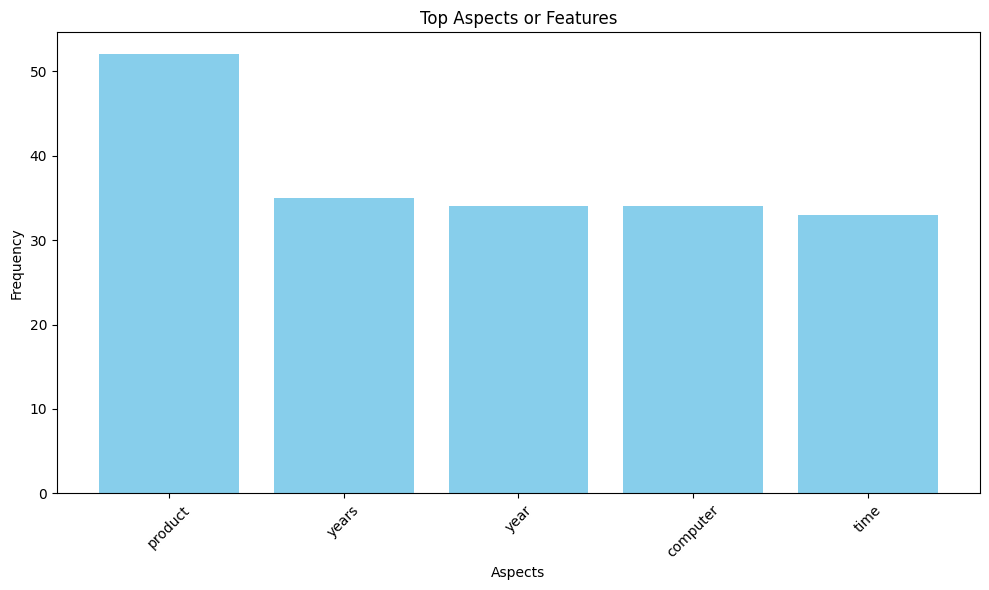

In [37]:
aspects, counts = zip(*top_aspects)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(aspects, counts, color='skyblue')
plt.xlabel('Aspects')
plt.ylabel('Frequency')
plt.title('Top Aspects or Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

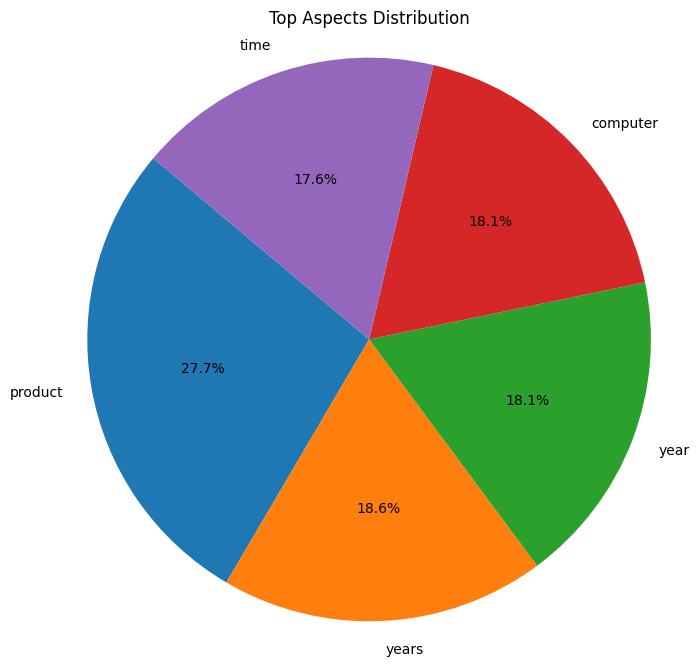

In [38]:
aspects, counts = zip(*top_aspects)

#pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=aspects, autopct='%1.1f%%', startangle=140)
plt.title('Top Aspects Distribution')
plt.axis('equal')  
plt.show()

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_review['reviews'], df5['sentiment_category'], test_size=0.4, random_state=42)
model = make_pipeline(TfidfVectorizer(), SVC(kernel='linear', random_state=42))
#model = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=100, random_state=42))
model.fit(X_train, y_train)   #Fit the model
predictions = model.predict(X_test) # Make predictions on the test set

#find accuracy
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, predictions))

# For new reviews,predict:
new_reviews = [
    "Very disappointed with the performance. Would not recommend.",
    "Amazing product"
]
new_predictions = model.predict(new_reviews)
print("\nPredicted Sentiments for New Reviews:", new_predictions)

Test Accuracy: 0.725

Classification Report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.77        18
           1       1.00      0.50      0.67        22

    accuracy                           0.73        40
   macro avg       0.81      0.75      0.72        40
weighted avg       0.83      0.72      0.71        40


Predicted Sentiments for New Reviews: [0 1]


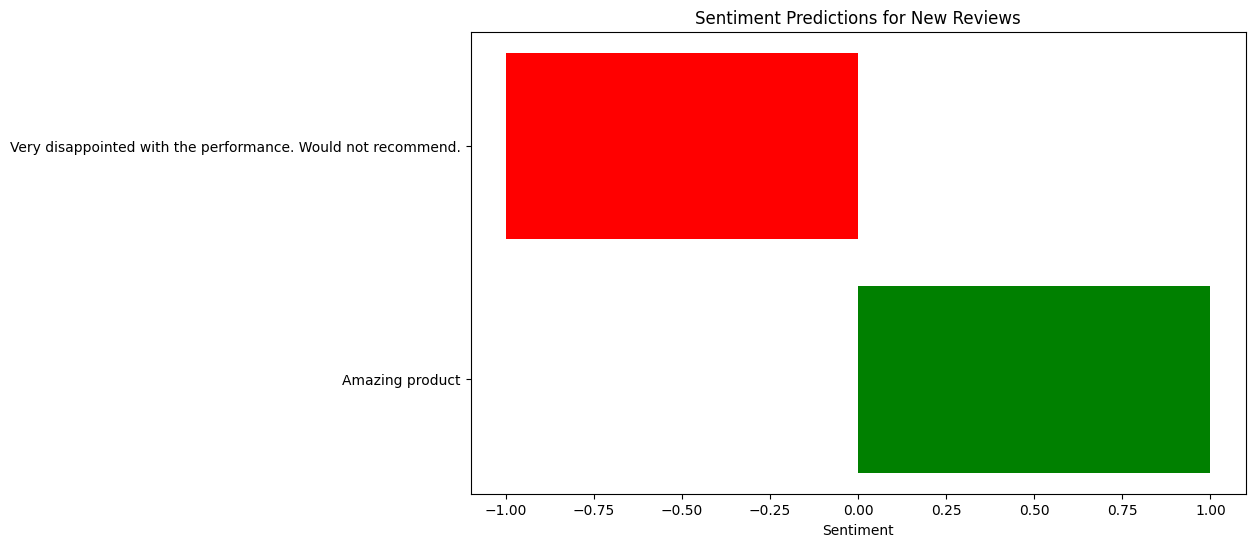

In [44]:
sentiment_mapping = {
    0: 'Negative',
    1: 'Positive'
}
predicted_sentiments = [sentiment_mapping[label] for label in new_predictions]
colors = ['red' if pred == 'Negative' else 'green' for pred in predicted_sentiments]

# Plotting sentiment predictions for new reviews
plt.figure(figsize=(10, 6))
plt.barh(range(len(new_reviews)), [1 if pred == 'Positive' else -1 for pred in predicted_sentiments], color=colors)
plt.yticks(range(len(new_reviews)), new_reviews)
plt.xlabel('Sentiment')
plt.title('Sentiment Predictions for New Reviews')
plt.gca().invert_yaxis()  # Invert y-axis to display the most recent review at the top
plt.show()

In [45]:
# top aspects and associated sentiment words with their synonyms
aspect_sentiments = {
    'product': ['excellent', 'good', 'great', 'bad', 'poor', 'disappointing'],
    'router': ['fast', 'reliable', 'slow', 'unreliable'],
    'switch': ['efficient', 'effective', 'inefficient', 'ineffective'],
    'port': ['compatible', 'incompatible', 'functional', 'non-functional'],
    'device': ['sophisticated', 'basic', 'advanced', 'outdated']
}

# rule-based sentiment analysis approach:
def rule_based_sentiment_analysis(review):
    sentiment_scores = {}
    for aspect, sentiment_words in aspect_sentiments.items():
        aspect_sentiment = 'neutral'
        for word in sentiment_words:
            if isinstance(review, str) and isinstance(word, str) and word in review.lower():
                aspect_sentiment = 'positive'
                break
        sentiment_scores[aspect] = aspect_sentiment
    
    return sentiment_scores
top_aspects = ['product', 'years', 'year', 'computer', 'time']
for aspect in top_aspects:
    reviews_with_aspect = df_review[df_review['aspects'].apply(lambda x: aspect in x)]['reviews']
    aspect_sentiments = reviews_with_aspect.apply(rule_based_sentiment_analysis)
    for idx, sentiments in aspect_sentiments.items():
        print(f"Review: {idx}")
        print("Sentiments:", sentiments)
    print()

Review: 1
Sentiments: {'product': 'neutral', 'router': 'neutral', 'switch': 'neutral', 'port': 'neutral', 'device': 'neutral'}
Review: 2
Sentiments: {'product': 'neutral', 'router': 'positive', 'switch': 'positive', 'port': 'neutral', 'device': 'positive'}
Review: 3
Sentiments: {'product': 'neutral', 'router': 'neutral', 'switch': 'neutral', 'port': 'neutral', 'device': 'neutral'}
Review: 5
Sentiments: {'product': 'neutral', 'router': 'neutral', 'switch': 'neutral', 'port': 'neutral', 'device': 'neutral'}
Review: 6
Sentiments: {'product': 'neutral', 'router': 'neutral', 'switch': 'neutral', 'port': 'neutral', 'device': 'neutral'}
Review: 8
Sentiments: {'product': 'positive', 'router': 'neutral', 'switch': 'neutral', 'port': 'neutral', 'device': 'neutral'}
Review: 15
Sentiments: {'product': 'positive', 'router': 'neutral', 'switch': 'neutral', 'port': 'neutral', 'device': 'neutral'}
Review: 19
Sentiments: {'product': 'neutral', 'router': 'neutral', 'switch': 'neutral', 'port': 'neutral'